## Import Libs

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, recall_score

In [32]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

## Load Data

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [3]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [4]:
print(train_df.shape)
print(test_df.shape)

(69999, 172)
(30000, 171)


In [5]:
train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


## Data Clean-up

### Drop ID Column

In [7]:
train_df.drop("id", inplace=True, axis=1)
test_df.drop("id", axis=1, inplace=True)

### Lets drop the date columns for now

In [8]:
obj_cols = train_df.columns[train_df.dtypes == 'object']
obj_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [9]:
train_df[obj_cols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [10]:
train_df.drop(obj_cols, axis=1, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 162 entries, circle_id to churn_probability
dtypes: float64(135), int64(27)
memory usage: 86.5 MB


In [11]:
train_df.shape

(69999, 162)

In [12]:
test_df.drop(obj_cols, axis=1, inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 161 entries, circle_id to jun_vbc_3g
dtypes: float64(135), int64(26)
memory usage: 36.9 MB


In [13]:
test_df.shape

(30000, 161)

### Drop features with more than 30% missing values

In [14]:
na_features_30 = train_df.columns[train_df.isna().mean() > 0.3]
print(na_features_30.shape)
print(na_features_30)

(27,)
Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')


In [15]:
train_df.drop(na_features_30,axis=1, inplace=True)
test_df.drop(na_features_30,axis=1, inplace=True)

In [16]:
print(train_df.shape)
print(test_df.shape)

(69999, 135)
(30000, 134)


### Fill remaining na with mean values

In [17]:
mean_values = train_df.mean()

train_df.fillna(mean_values, inplace=True)
test_df.fillna(mean_values, inplace=True)

In [18]:
train_df.columns[train_df.isna().sum() > 0]

Index([], dtype='object')

In [19]:
train_df.shape

(69999, 135)

## Feature Engineering
- Aggregrate data for month 6,7,8 into one column

In [20]:
reg_cols = ["circle_id", "loc_og_t2o_mou" , "std_og_t2o_mou" ,"loc_ic_t2o_mou", "aon" ,   "aug_vbc_3g" ,   "jul_vbc_3g" ,  "jun_vbc_3g" ,"churn_probability"]
reg_cols = set(reg_cols)

cols = set(train_df.columns)

rep_cols = sorted(list(reg_cols.symmetric_difference(cols)))
print(len(rep_cols))

reg_cols = list(reg_cols)
reg_cols_test = [col for col in reg_cols if col != 'churn_probability']

feat_engg_df = pd.DataFrame()
feat_engg_df_test = pd.DataFrame()

i=0
while(i<len(rep_cols)):
    col_name = rep_cols[i][:-1] + "sum"
    feat_engg_df.loc[:,col_name] = np.sum(train_df.loc[:,[rep_cols[i], rep_cols[i+1], rep_cols[i+2]]],axis=1)
    feat_engg_df_test.loc[:,col_name] = np.sum(test_df.loc[:,[rep_cols[i], rep_cols[i+1], rep_cols[i+2]]],axis=1)
    i = i + 3

feat_engg_df[reg_cols] = train_df[reg_cols]
feat_engg_df_test[reg_cols_test] = test_df[reg_cols_test]
feat_engg_df.head()

126


,arpu_sum,ic_others_sum,isd_ic_mou_sum,isd_og_mou_sum,last_day_rch_amt_sum,loc_ic_mou_sum,loc_ic_t2f_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2t_mou_sum,loc_og_mou_sum,...,vol_3g_mb_sum,jun_vbc_3g,churn_probability,loc_og_t2o_mou,loc_ic_t2o_mou,circle_id,jul_vbc_3g,std_og_t2o_mou,aon,aug_vbc_3g
0,125.813,1.80,0.0,0.0,130,52.73,0.00,38.82,13.90,26.18,...,0.00,0.0,0,0.0,0.0,109,0.0,0.0,1958,0.0
1,165.740,0.00,0.0,0.0,0,67.91,5.41,31.18,31.30,0.00,...,3.96,0.0,0,0.0,0.0,109,0.0,0.0,710,0.0
2,163.982,0.25,0.0,0.0,120,155.73,0.00,138.55,17.16,37.62,...,0.00,0.0,0,0.0,0.0,109,0.0,0.0,882,0.0
3,472.717,0.00,0.0,0.0,270,217.13,8.04,155.36,53.70,117.38,...,0.00,0.0,0,0.0,0.0,109,0.0,0.0,982,0.0
4,470.464,0.00,0.0,0.0,65,59.21,15.28,34.40,9.49,100.61,...,0.00,0.0,0,0.0,0.0,109,0.0,0.0,647,0.0


In [21]:
feat_engg_df_test.head()

,arpu_sum,ic_others_sum,isd_ic_mou_sum,isd_og_mou_sum,last_day_rch_amt_sum,loc_ic_mou_sum,loc_ic_t2f_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2t_mou_sum,loc_og_mou_sum,...,vol_2g_mb_sum,vol_3g_mb_sum,jun_vbc_3g,loc_og_t2o_mou,loc_ic_t2o_mou,circle_id,jul_vbc_3g,std_og_t2o_mou,aon,aug_vbc_3g
0,221.657,0.00,0.00,0.0,60,114.48,0.26,24.33,89.87,117.15,...,0.0,0.0,0.00,0.0,0.0,109,0.00,0.0,1692,0.00
1,1290.604,0.00,386.74,0.8,250,518.36,1.49,467.29,49.55,1586.26,...,0.0,0.0,0.00,0.0,0.0,109,0.00,0.0,2533,0.00
2,1510.967,0.00,0.00,0.0,0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,241.84,0.0,0.0,109,758.41,0.0,277,525.61
3,239.340,0.00,10.08,0.0,260,1582.56,2.02,1444.71,135.79,129.73,...,0.0,0.0,0.00,0.0,0.0,109,0.00,0.0,1244,0.00
4,1126.472,0.16,0.00,0.0,310,37.33,0.00,27.05,10.27,31.79,...,0.0,0.0,0.00,0.0,0.0,109,0.00,0.0,462,0.00


## EDA

### Drop columns with zero variance

In [22]:
zero_var_cols = feat_engg_df.columns[feat_engg_df.var() == 0]
zero_var_cols

Index(['std_ic_t2o_mou_sum', 'std_og_t2c_mou_sum', 'loc_og_t2o_mou',
       'loc_ic_t2o_mou', 'circle_id', 'std_og_t2o_mou'],
      dtype='object')

In [23]:
feat_engg_df.drop(zero_var_cols, axis=1, inplace=True)
feat_engg_df_test.drop(zero_var_cols, axis=1, inplace=True)

In [24]:
print(feat_engg_df.shape)
print(feat_engg_df_test.shape)

(69999, 45)
(30000, 44)


### Correlation Matrix
- The columns have high correlation and either of them can be dropped
- arpu_sum - total_rech_amt_sum : 0.99
- loc_ic_mou_sum - total_ic_mou_sum : 0.89
- onnet_mou_sum - std_og_t2t_mou_sum : 0.85
- std_ic_t2m_mou_sum - std_ic_mou_sum : 0.86

<AxesSubplot:>

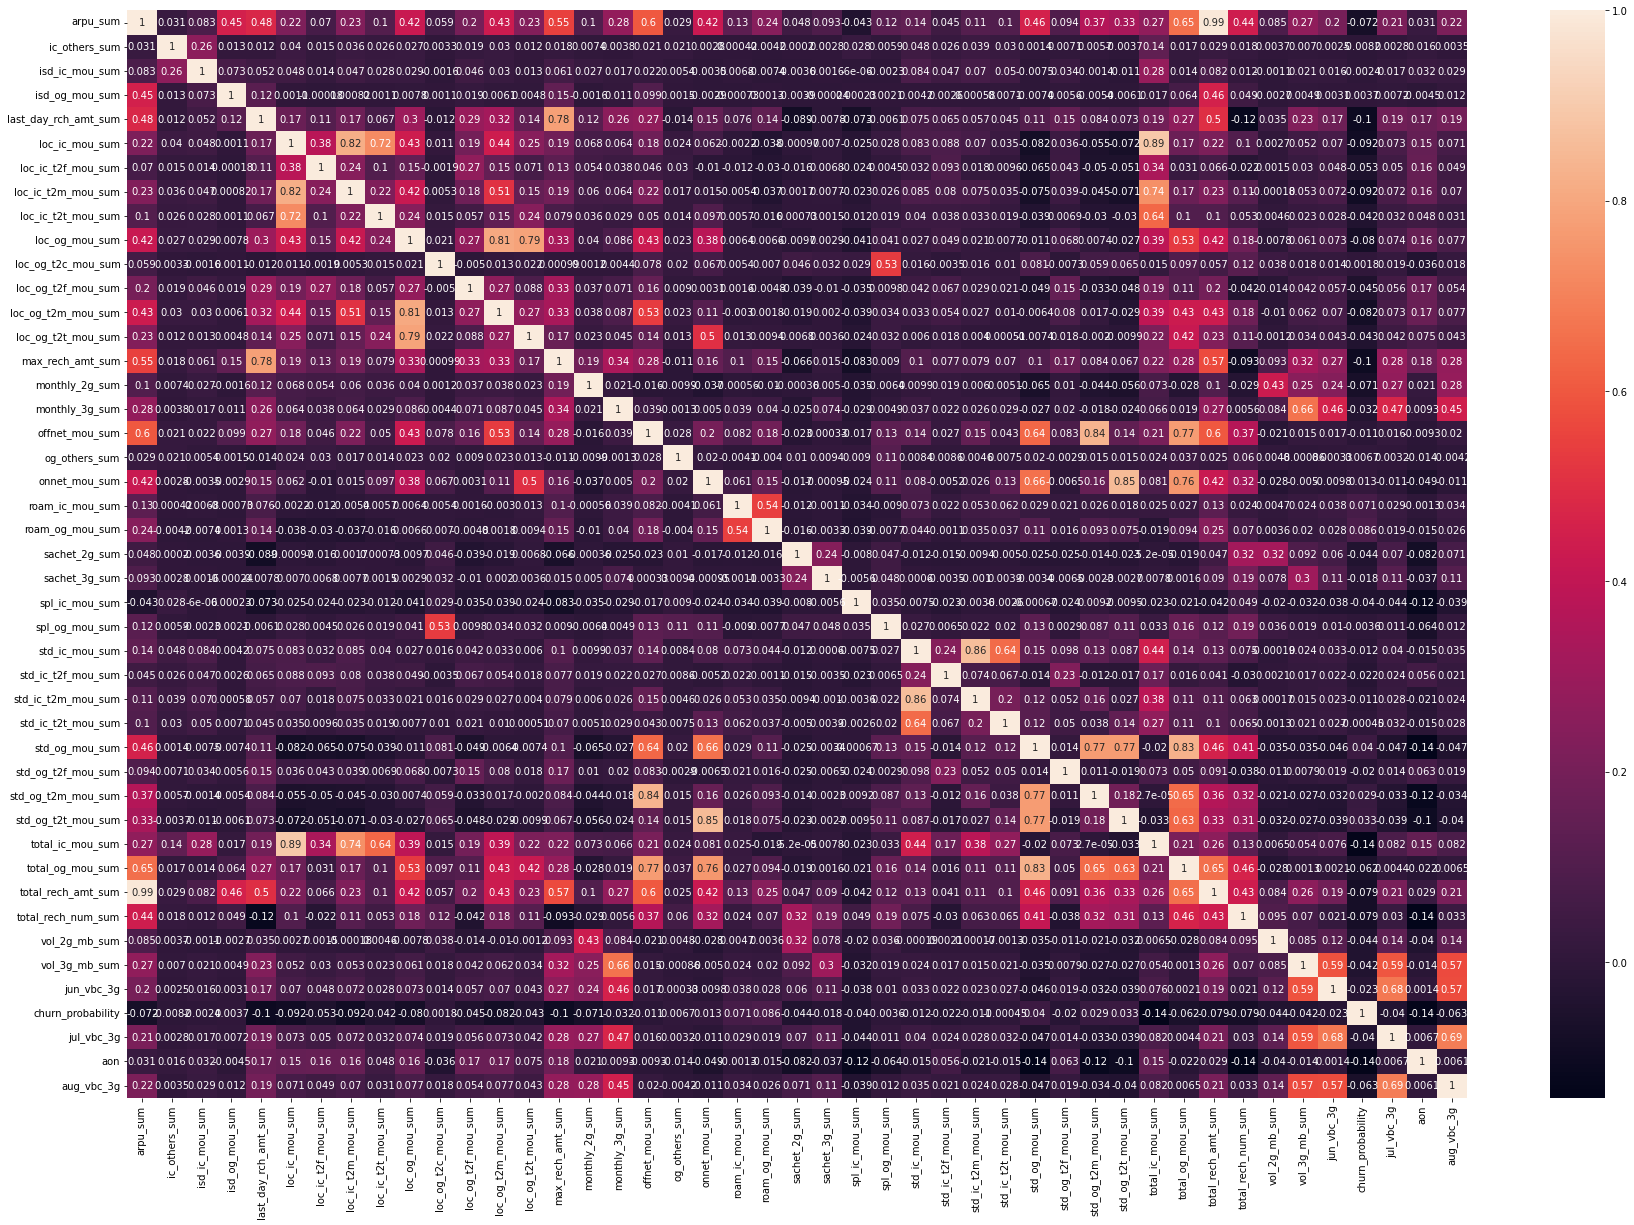

In [25]:
plt.figure(figsize=(30,20))
sns.heatmap(feat_engg_df.corr(), annot=True)

In [26]:
feat_engg_df.drop(["arpu_sum", "loc_ic_mou_sum", "std_og_t2t_mou_sum", "std_ic_mou_sum"], axis=1, inplace=True)
feat_engg_df_test.drop(["arpu_sum", "loc_ic_mou_sum", "std_og_t2t_mou_sum", "std_ic_mou_sum"], axis=1, inplace=True)

In [27]:
print(feat_engg_df.shape)
print(feat_engg_df_test.shape)

(69999, 41)
(30000, 40)


<AxesSubplot:>

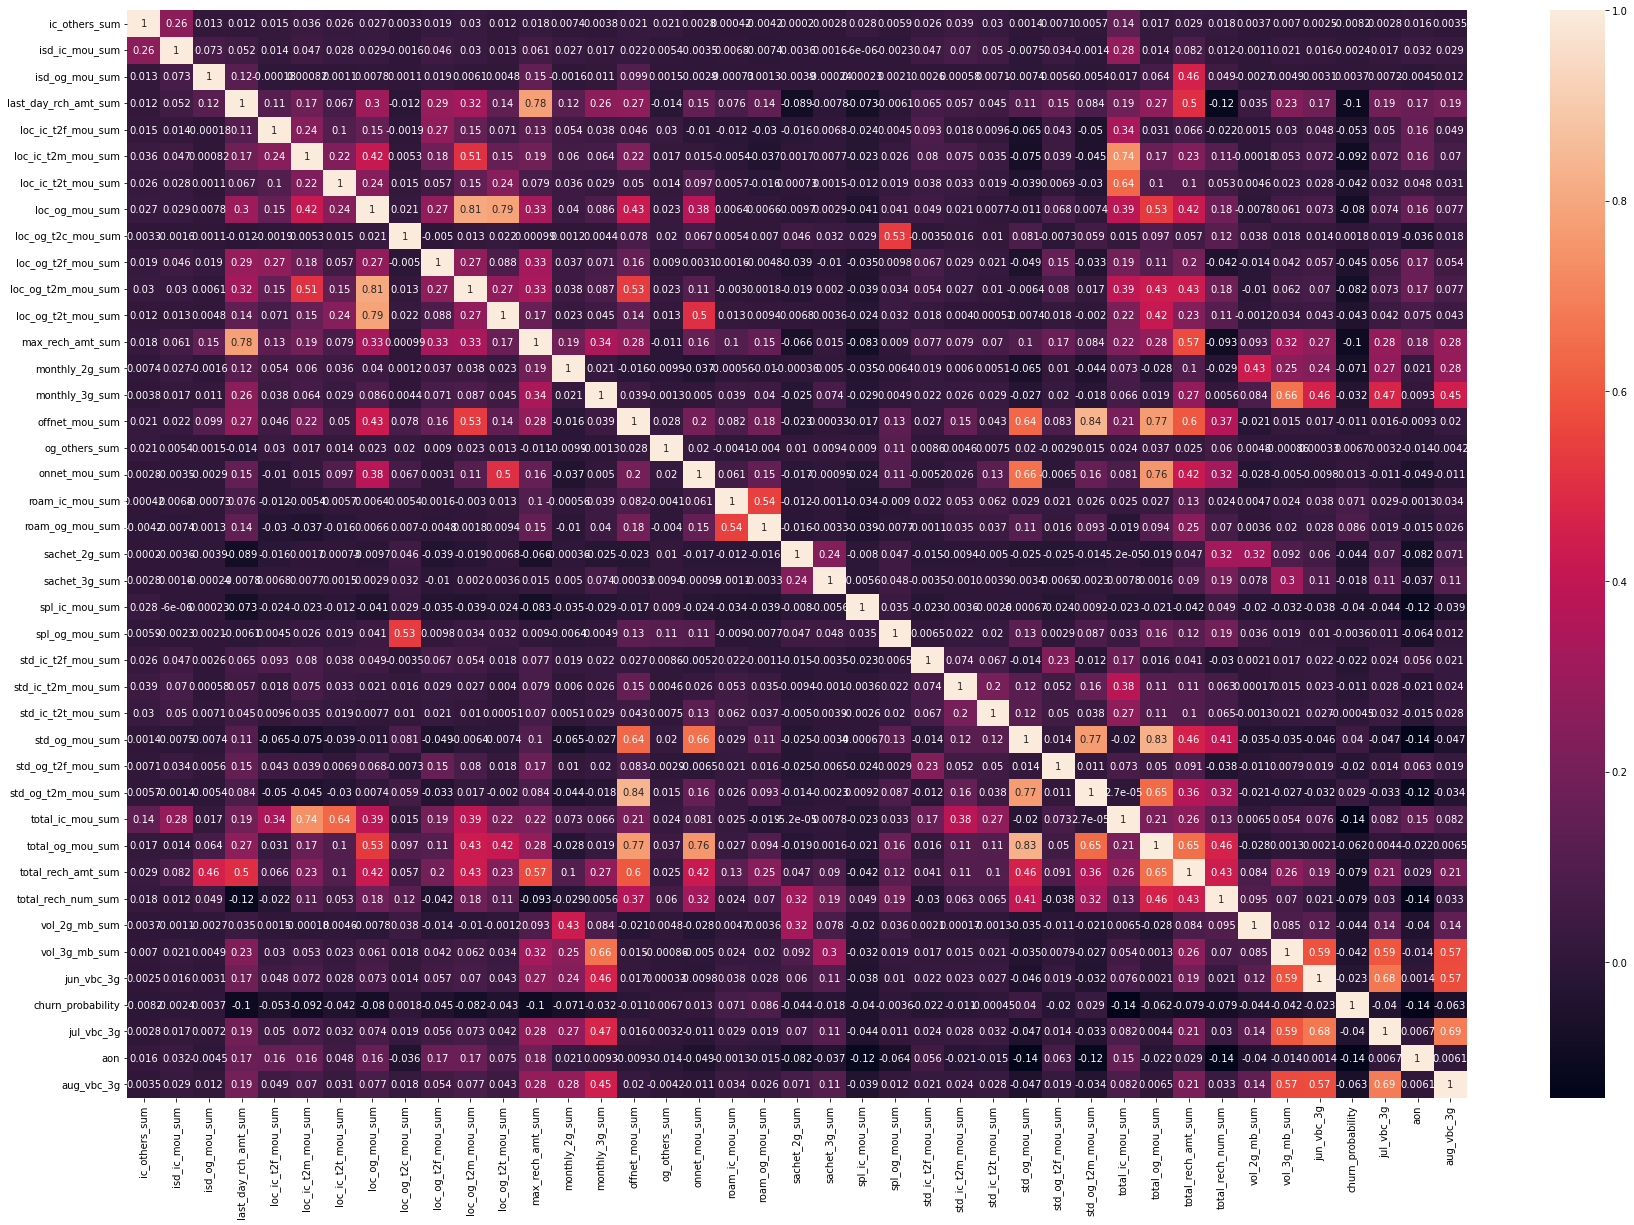

In [28]:
plt.figure(figsize=(30,20))
sns.heatmap(feat_engg_df.corr(), annot=True)

<AxesSubplot:xlabel='total_og_mou_sum', ylabel='total_ic_mou_sum'>

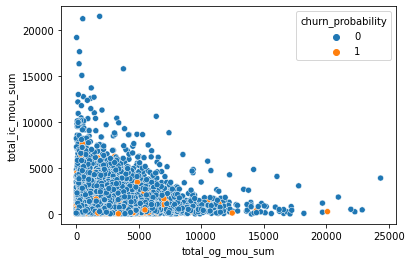

In [180]:
#BiVariate Analysis
sns.scatterplot(x=feat_engg_df['total_og_mou_sum'],y=feat_engg_df['total_ic_mou_sum'], hue=feat_engg_df['churn_probability'])

#Inference The chances of churn decreases when incoming and outgoing calls increases

<AxesSubplot:xlabel='total_og_mou_sum', ylabel='aon'>

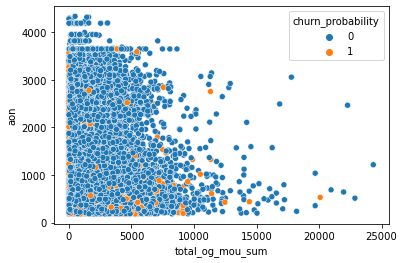

In [181]:
sns.scatterplot(x=feat_engg_df['total_og_mou_sum'],y=feat_engg_df['aon'], hue=feat_engg_df['churn_probability'])
#Inference The chances of churn decreases when outgoing calls are high , where as when there network age increases , and less outgoing calls can be sign of churn

<AxesSubplot:xlabel='total_ic_mou_sum', ylabel='aon'>

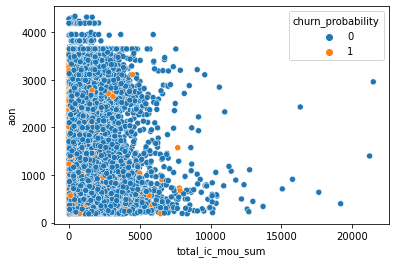

In [182]:
sns.scatterplot(x=feat_engg_df['total_ic_mou_sum'],y=feat_engg_df['aon'], hue=feat_engg_df['churn_probability'])
#Inference The chances of churn decreases when incoming calls are high , where as when there network age increases , and less incoming calls can be sign of churn

<AxesSubplot:xlabel='max_rech_amt_sum', ylabel='aon'>

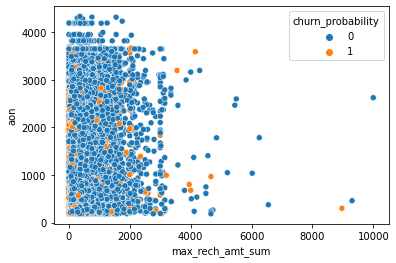

In [183]:
sns.scatterplot(x=feat_engg_df['max_rech_amt_sum'],y=feat_engg_df['aon'], hue=feat_engg_df['churn_probability'])

## Feature Split

In [29]:
y = feat_engg_df["churn_probability"]
X = feat_engg_df.copy()
X.pop("churn_probability")

0        0
1        0
2        0
3        0
4        0
        ..
69994    0
69995    0
69996    0
69997    0
69998    0
Name: churn_probability, Length: 69999, dtype: int64

In [30]:
X_test_unseen = feat_engg_df_test

## Modeling

### Scale the features for linear models

In [33]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X)
X_test_scaled = ss.transform(feat_engg_df_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(69999, 40)
(30000, 40)


### Hyperparameter tuning for DecisionTree, RandomForest Classifiers using GridSearchCV

In [34]:
pipeline = Pipeline([
    ('clf', None)
])
parameters = [
    {
    'clf' : [DecisionTreeClassifier()],
    'clf__max_depth' : (3,5,10),
    'clf__min_samples_leaf' : (100,200,500),
    'clf__criterion': ("gini", "entropy")
    },
    {
    'clf' : [RandomForestClassifier(n_estimators=10)],
    'clf__max_depth' : (3,5,10),
    'clf__min_samples_leaf' : (100,200,500),
    'clf__criterion': ("gini", "entropy","log_loss")
    }
]

cv = GridSearchCV(pipeline, parameters,
                        scoring= 'accuracy',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1) 


cv.fit(X, y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', None)]),
             param_grid=[{'clf': [DecisionTreeClassifier()],
                          'clf__criterion': ('gini', 'entropy'),
                          'clf__max_depth': (3, 5, 10),
                          'clf__min_samples_leaf': (100, 200, 500)},
                         {'clf': [RandomForestClassifier(criterion='log_loss',
                                                         max_depth=10,
                                                         min_samples_leaf=100,
                                                         n_estimators=10)],
                          'clf__criterion': ('gini', 'entropy', 'log_loss'),
                          'clf__max_depth': (3, 5, 10),
                          'clf__min_samples_leaf': (100, 200, 500)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [35]:
print(cv.best_score_)
print(cv.best_params_)
print(cv.best_estimator_)

0.9329704723806802
{'clf': RandomForestClassifier(criterion='log_loss', max_depth=10, min_samples_leaf=100,
                       n_estimators=10), 'clf__criterion': 'log_loss', 'clf__max_depth': 10, 'clf__min_samples_leaf': 100}
Pipeline(steps=[('clf',
                 RandomForestClassifier(criterion='log_loss', max_depth=10,
                                        min_samples_leaf=100,
                                        n_estimators=10))])


In [36]:
best_clf = cv.best_estimator_['clf']

### Predict for the unseen test.csv dataset

In [39]:
y_pred = best_clf.predict(X_test_unseen)
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([28225,  1775]))

#### Generate CSV file for submission

In [40]:
y_pred_df = pd.DataFrame(y_pred, index=np.arange(69999, 99999)).reset_index()
y_pred_df.columns = ["id","churn_probability"]

y_pred_df.to_csv("Krishna_Praveen_Piyush.csv", index=False)

### Modeling with PCA

In [41]:
pca = PCA(random_state=42)
pca.fit(X_train_scaled)

PCA(random_state=42)

#### 85% of variance are explained by 20 PCA features

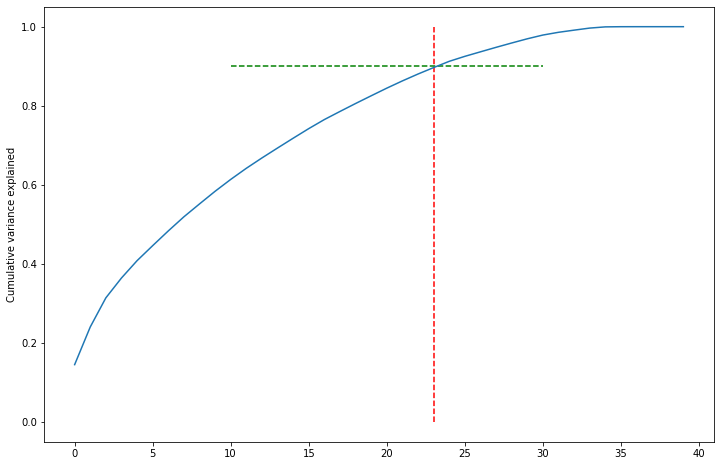

In [42]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=23, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.9, xmax=30, xmin=10, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [43]:
ipca = IncrementalPCA(n_components=23)
X_train_pca = ipca.fit_transform(X_train_scaled)
X_train_pca.shape

(69999, 23)

In [44]:
X_test_unseen_pca = ipca.transform(X_test_scaled)
X_test_unseen_pca.shape

(30000, 23)

In [45]:
lr_pca = LogisticRegression()
model_lr_pca = lr_pca.fit(X_train_pca, y)

print(f"Training Score: {model_lr_pca.score(X_train_pca, y)}")

Training Score: 0.8974556779382563


In [46]:
pipeline = Pipeline([
    ('clf', None)
])
parameters = [
    {
    'clf' : [DecisionTreeClassifier()],
    'clf__max_depth' : (3,5,10),
    'clf__min_samples_leaf' : (100,200,500),
    'clf__criterion': ("gini", "entropy")
    },
    {
    'clf' : [RandomForestClassifier(n_estimators=10)],
    'clf__max_depth' : (3,5,10),
    'clf__min_samples_leaf' : (100,200,500),
    'clf__criterion': ("gini", "entropy","log_loss")
    }
]

cv = GridSearchCV(pipeline, parameters,
                        scoring= 'accuracy',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1) 


cv.fit(X_train_pca, y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', None)]),
             param_grid=[{'clf': [DecisionTreeClassifier()],
                          'clf__criterion': ('gini', 'entropy'),
                          'clf__max_depth': (3, 5, 10),
                          'clf__min_samples_leaf': (100, 200, 500)},
                         {'clf': [RandomForestClassifier(criterion='entropy',
                                                         max_depth=10,
                                                         min_samples_leaf=100,
                                                         n_estimators=10)],
                          'clf__criterion': ('gini', 'entropy', 'log_loss'),
                          'clf__max_depth': (3, 5, 10),
                          'clf__min_samples_leaf': (100, 200, 500)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [47]:
print(cv.best_score_)
print(cv.best_params_)
print(cv.best_estimator_)

0.9066414927596869
{'clf': RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=100,
                       n_estimators=10), 'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 100}
Pipeline(steps=[('clf',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=100,
                                        n_estimators=10))])


In [48]:
best_clf = cv.best_estimator_['clf']

In [49]:
y_pred = best_clf.predict(X_test_unseen_pca)
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([29429,   571]))

#### The PCA based model produced slightly lesser accuracy on the unseen test dataset

In [50]:
y_pred_df = pd.DataFrame(y_pred, index=np.arange(69999, 99999)).reset_index()
y_pred_df.columns = ["id","churn_probability"]

#y_pred_df.to_csv("Krishna_Praveen_Piyush.csv", index=False)

### Model for high value customers

#### Filter high value customers as the ones above the 75 percentile of sum of recharge amount

In [51]:
feat_engg_df['total_rech_amt_sum'].describe()

count     69999.000000
mean        974.362505
std        1106.099526
min           0.000000
25%         360.000000
50%         692.000000
75%        1244.000000
max      120845.000000
Name: total_rech_amt_sum, dtype: float64

In [52]:
hvc_df = feat_engg_df[feat_engg_df['total_rech_amt_sum'] >= 1244]
hvc_df.shape

(17523, 41)

In [53]:
hvc_y = hvc_df["churn_probability"]
hvc_X = hvc_df.copy()
hvc_X.pop("churn_probability")

12       0
15       0
23       0
25       0
27       0
        ..
69980    0
69981    0
69984    0
69990    0
69996    0
Name: churn_probability, Length: 17523, dtype: int64

In [54]:
print(hvc_X.shape)
print(hvc_y.shape)

(17523, 40)
(17523,)


In [55]:
X_train_hvc, X_test_hvc, y_train_hvc, y_test_hvc = train_test_split(hvc_X,hvc_y, test_size=0.2, random_state=42)
(X_train_hvc.shape, y_train_hvc.shape, X_test_hvc.shape, y_test_hvc.shape)

((14018, 40), (14018,), (3505, 40), (3505,))

In [63]:
y_train_hvc.value_counts()

0    13128
1      890
Name: churn_probability, dtype: int64

In [59]:
X_train_hvc

,ic_others_sum,isd_ic_mou_sum,isd_og_mou_sum,last_day_rch_amt_sum,loc_ic_t2f_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2t_mou_sum,loc_og_mou_sum,loc_og_t2c_mou_sum,loc_og_t2f_mou_sum,...,total_ic_mou_sum,total_og_mou_sum,total_rech_amt_sum,total_rech_num_sum,vol_2g_mb_sum,vol_3g_mb_sum,jun_vbc_3g,jul_vbc_3g,aon,aug_vbc_3g
47151,0.000000,0.000000,0.000000,729,14.660000,418.880000,603.560000,1018.540000,0.00000,49.350000,...,1069.86,1114.78,1915,20,1156.30,0.00,0.00,0.00,772,0.00
28235,0.000000,0.000000,0.000000,380,5.840000,653.800000,59.100000,1262.010000,0.00000,0.650000,...,741.71,3410.11,2051,27,0.00,0.00,0.00,0.00,3367,0.00
29293,0.963214,55.718424,78.371648,1849,15.846763,117.774731,55.766388,188.466486,1.42084,15.311652,...,72.18,125.54,1849,11,0.00,0.00,0.00,0.00,1440,0.00
67350,0.000000,0.000000,0.000000,80,2.920000,55.150000,21.570000,267.610000,37.58000,24.460000,...,81.71,452.51,1627,76,337.46,17392.60,347.80,563.13,2372,407.89
14420,0.000000,0.000000,0.000000,90,368.060000,616.530000,404.310000,1015.330000,0.00000,4.780000,...,1425.87,1045.48,1359,36,40.45,1367.14,339.54,399.05,3401,148.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45240,0.000000,0.000000,0.000000,502,54.350000,398.690000,137.560000,839.680000,0.00000,158.430000,...,612.01,857.53,1756,12,123.04,2492.37,523.04,845.42,1901,1041.23
47969,0.000000,0.000000,0.000000,276,13.670000,208.210000,114.690000,203.060000,0.00000,18.520000,...,382.50,1383.34,1628,23,4.21,1290.63,10.54,22.16,1623,28.44
21916,7.583214,785.538424,916.491648,500,14.836763,229.494731,97.356388,370.846486,1.42084,3.661652,...,972.48,1148.72,13900,52,0.00,0.00,0.00,0.00,185,0.00
3444,4.190000,27.960000,0.000000,169,20.170000,541.530000,104.830000,1236.330000,2.93000,6.240000,...,774.66,3437.42,2869,47,0.00,0.00,0.00,0.00,235,0.00


#### Lets go with DT as we need the explaination

In [161]:
pipeline = Pipeline([
    ('clf', None)
])
parameters = [
    {
    'clf' : [DecisionTreeClassifier()],
    'clf__max_depth' : (3,5,10),
    'clf__min_samples_leaf' : (100,200, 500),    
    'clf__criterion': ("gini", "entropy")
    }
]

cv = GridSearchCV(pipeline, parameters,
                        scoring= 'accuracy',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1) 


cv.fit(X_train_hvc, y_train_hvc)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', None)]),
             param_grid=[{'clf': [DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=5,
                                                         min_samples_leaf=100)],
                          'clf__criterion': ('gini', 'entropy'),
                          'clf__max_depth': (3, 5, 10),
                          'clf__min_samples_leaf': (100, 200, 500)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [162]:
print(cv.best_score_)
print(cv.best_params_)

0.9385074988434543
{'clf': DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100), 'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 100}


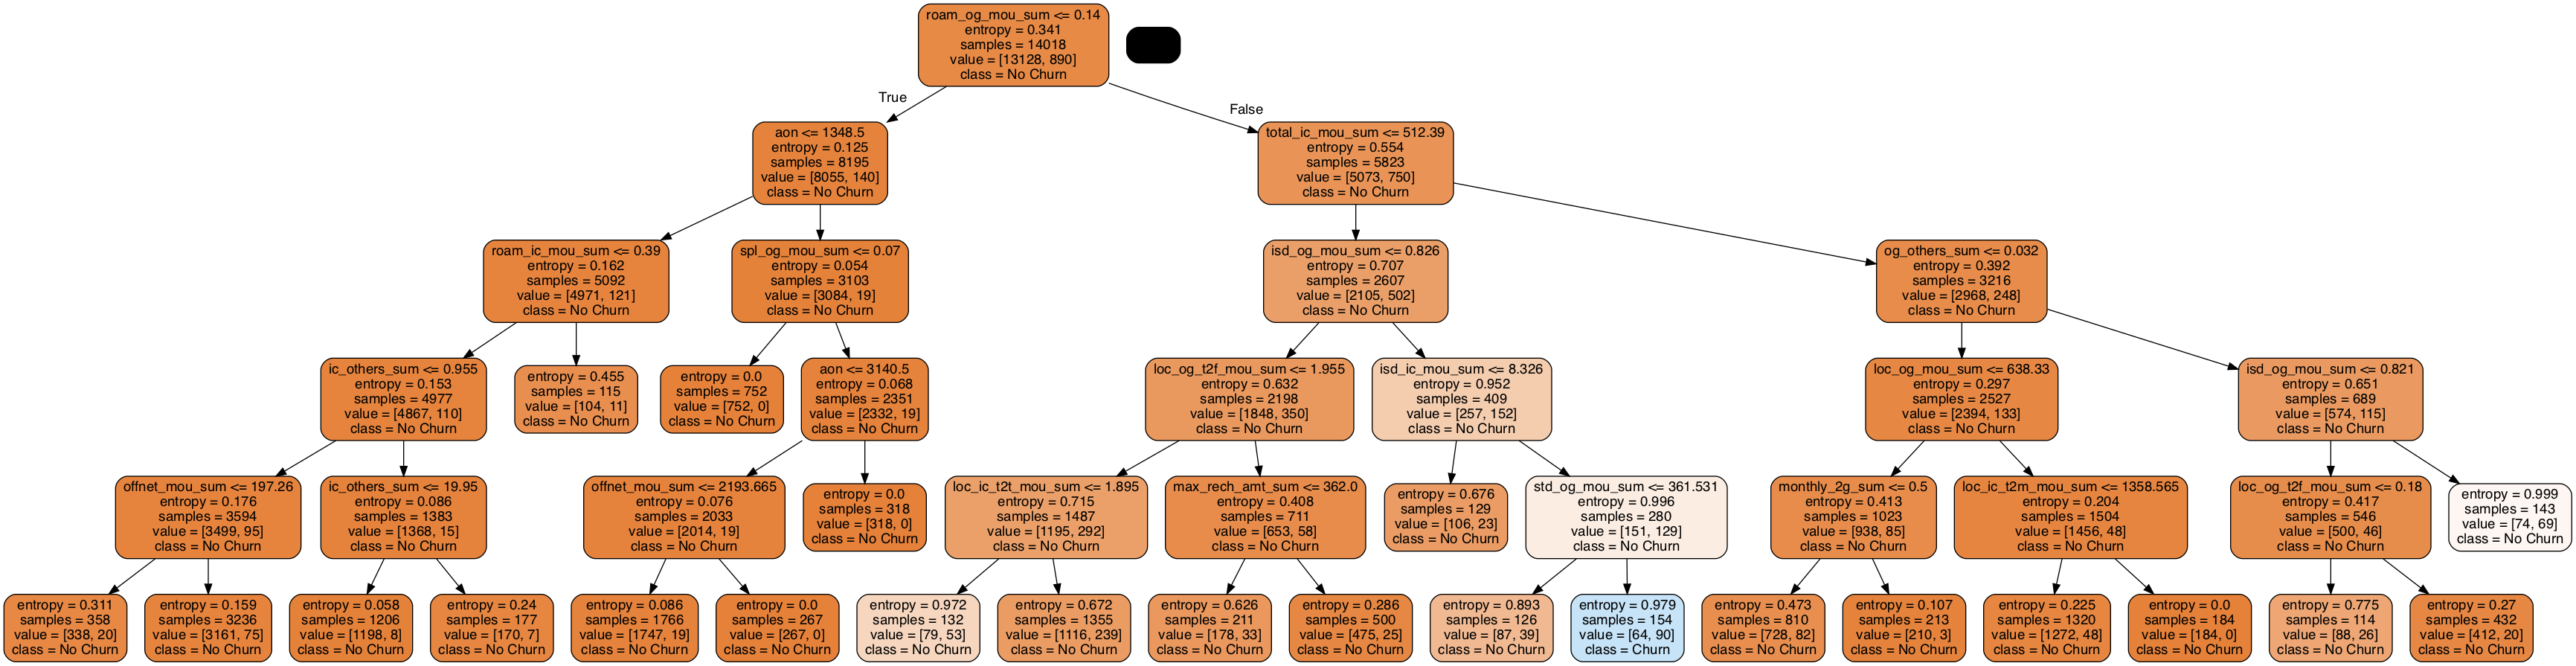

In [163]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(cv.best_estimator_['clf'], out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Churn', "Churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

In [164]:
best_clf = cv.best_estimator_['clf']

In [165]:
y_pred = best_clf.predict(X_test_hvc)

In [167]:
accuracy_score(y_test_hvc, y_pred)

0.9429386590584878

In [168]:
recall_score(y_test_hvc, y_pred)

0.14953271028037382

In [169]:
print(classification_report(y_test_hvc, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3291
           1       0.64      0.15      0.24       214

    accuracy                           0.94      3505
   macro avg       0.79      0.57      0.61      3505
weighted avg       0.93      0.94      0.93      3505



In [170]:
y_pred_prob = best_clf.predict_proba(X_test_hvc)
y_pred_df = pd.DataFrame(y_pred_prob)
y_pred = y_pred_df.iloc[:,[1]]
y_pred.head()

y_pred['y_true'] = y_test_hvc.values
y_pred["y_predicted"] = best_clf.predict(X_test_hvc)

y_pred.columns = ["y_pred_prob", "y_true", "y_predicted"]

y_pred.head()

,y_pred_prob,y_true,y_predicted
0,0.050000,0,0
1,0.010759,0,0
2,0.036364,0,0
3,0.036364,0,0
4,0.010759,0,0


In [171]:
from sklearn import metrics

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

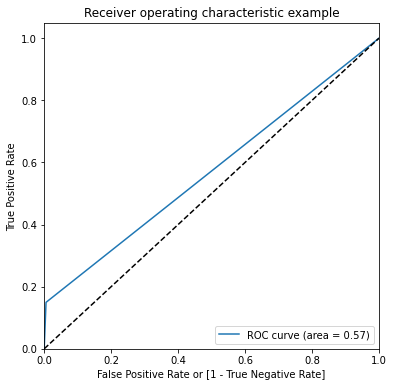

(array([0.        , 0.00546946, 1.        ]),
 array([0.        , 0.14953271, 1.        ]),
 array([2, 1, 0]))

In [172]:
draw_roc(y_pred.y_true, y_pred.y_predicted)

In [176]:
threshold = 0.1

y_pred['adjussted_y_predicted'] = y_pred['y_pred_prob'].map(lambda x: 1 if x > threshold else 0)
y_pred.head()

,y_pred_prob,y_true,y_predicted,adjussted_y_predicted
0,0.050000,0,0,0
1,0.010759,0,0,0
2,0.036364,0,0,0
3,0.036364,0,0,0
4,0.010759,0,0,0


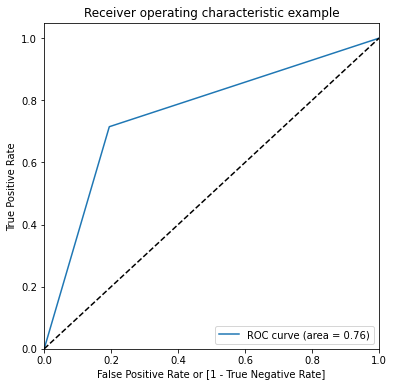

(array([0.        , 0.19446977, 1.        ]),
 array([0.        , 0.71495327, 1.        ]),
 array([2, 1, 0]))

In [177]:
draw_roc(y_pred.y_true, y_pred.adjussted_y_predicted)

In [178]:
recall_score(y_pred.y_true, y_pred.adjussted_y_predicted)

0.7149532710280374

In [179]:
accuracy_score(y_pred.y_true, y_pred.adjussted_y_predicted)

0.8

### By comprising on the overall accuracy, we have improved the recall score. This is essential as we are interested in not missing customers who could potentially churn than the ones who wouldn't

### Strategies 

- The decision tree graph gives us the important features. We can use this to suggest appropriate plans for the churn customers 
- for Ex, 
    - for customers with 'roam_og_mou_sum' > 0.14, we can provide them with plans that we can reduce their 'std_og_mou_sum' values